In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
### for accessing file from google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/MLlab/oct-mtech/
data =pd.read_csv("diabetes.csv")

Mounted at /content/drive
/content/drive/My Drive/MLlab/oct-mtech


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
X = data.iloc[:,0:8]  #independent columns
y = data.iloc[:,-1]    #target column


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fit a naive classifier without PCA
clf_without_pca = GaussianNB()
clf_without_pca.fit(X_train, y_train)
y_pred_without_pca = clf_without_pca.predict(X_test)
accuracy_without_pca = accuracy_score(y_test, y_pred_without_pca)

In [ ]:
# Apply PCA
pca = PCA(n_components=6)  # Reduce to 6 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Fit a naive bayes classifier with PCA
clf_with_pca = GaussianNB()
clf_with_pca.fit(X_train_pca, y_train)
y_pred_with_pca = clf_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)

In [ ]:
# Display the results
print(f"Accuracy without PCA: {accuracy_without_pca}")
print(f"Accuracy with PCA: {accuracy_with_pca}")

Accuracy without PCA: 0.7445887445887446
Accuracy with PCA: 0.7619047619047619


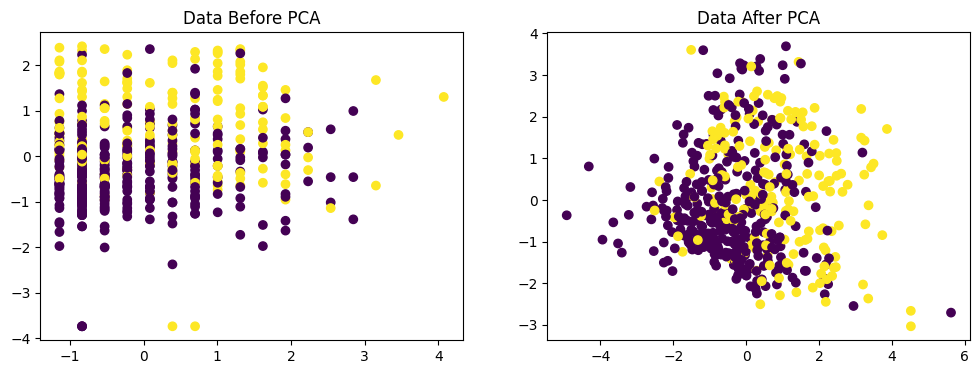

In [ ]:
# Plot the data before and after PCA
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Data Before PCA')

plt.subplot(122)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.title('Data After PCA')
plt.show()